In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept of technology and AI/WHR-2024-5CS037.csv')

# 1. Dataset Overview
# 1.1 Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# 1.2 Identify the number of rows and columns
rows, cols = df.shape
print(f"\nNumber of rows: {rows}, Number of columns: {cols}")

# 1.3 List all the columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

#Basic Statistics
# 2.1 Calculate mean, median, and standard deviation for the Score column

In [ ]:

mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print(f"\nScore Statistics:\nMean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")


Score Statistics:
Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


# 2.2 Identify the country with the highest and lowest happiness scores

In [ ]:

max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"\nCountry having highest happiness score: {max_score_country}")
print(f"Country having happiness score: {min_score_country}")


Country having highest happiness score: Finland
Country having happiness score: Afghanistan


# 3. Missing Values

# 3.1 Check for missing values

In [ ]:

missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values[missing_values > 0])


Missing values in the dataset:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


# 4. Filtering and Sorting

# 4.1 Filter countries with Score > 7.5

In [ ]:

filtered_df = df[df['score'] > 7.5]
print("\nCountries with Score > 7.5:")
print(filtered_df)


Countries with Score > 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


# 4.2 Sort by GDP per Capita in descending order and display top 10 rows

In [ ]:
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries by GDP per Capita (Score > 7.5):")
print(sorted_df.head(10))



Top 10 countries by GDP per Capita (Score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


# 5. Adding New Columns

In [ ]:
# 5.1 Create a new column 'Happiness Category'
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nAdded 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))
count = df['Happiness Category'].value_counts()
count


Added 'Happiness Category' column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


,count
Happiness Category,
Medium,70
High,56
Low,17


# 6. Data Visualizations

<ipython-input-3-d53f794921d2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')


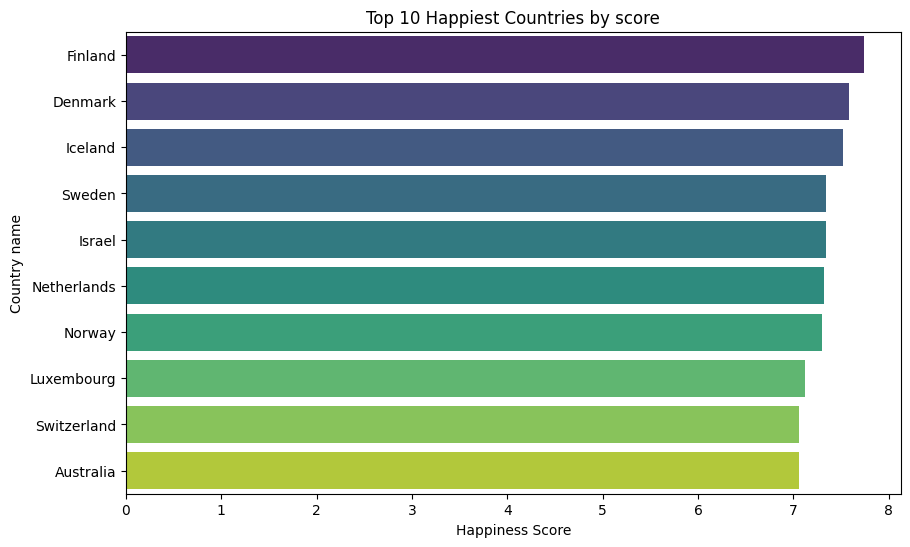

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 6.1 Bar Plot: Top 10 happiest countries by Score

# 1. Ensure 'score' column is numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# 2. Get top 10 happiest countries
top_10_happiest = df.nlargest(10, 'score')

# 3. Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries by score')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')
plt.show()

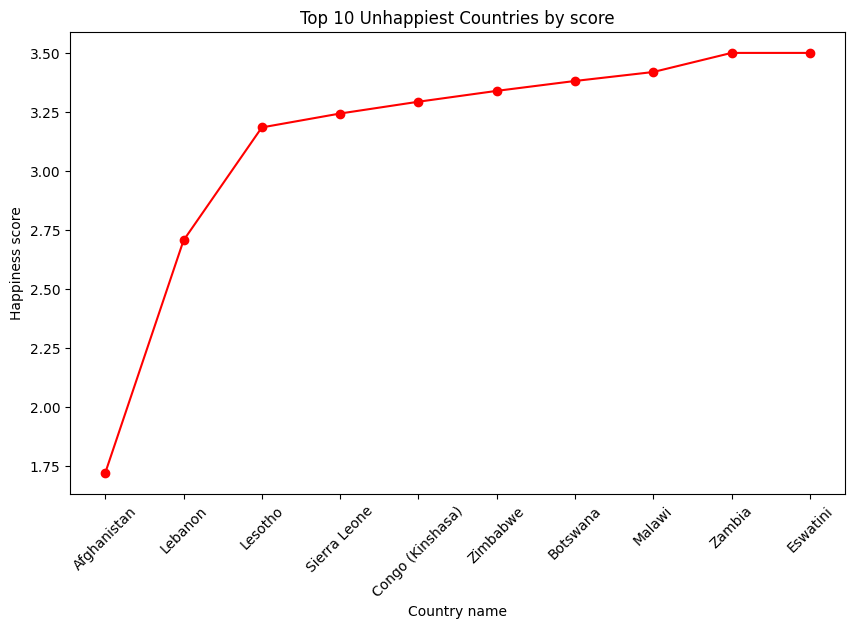

In [ ]:
# 6.2 Line Plot: Top 10 unhappiest countries by Score
bottom_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by score')
plt.xlabel('Country name')
plt.ylabel('Happiness score')
plt.xticks(rotation=45)
plt.show()

# 6.3 Histogram for the Score column

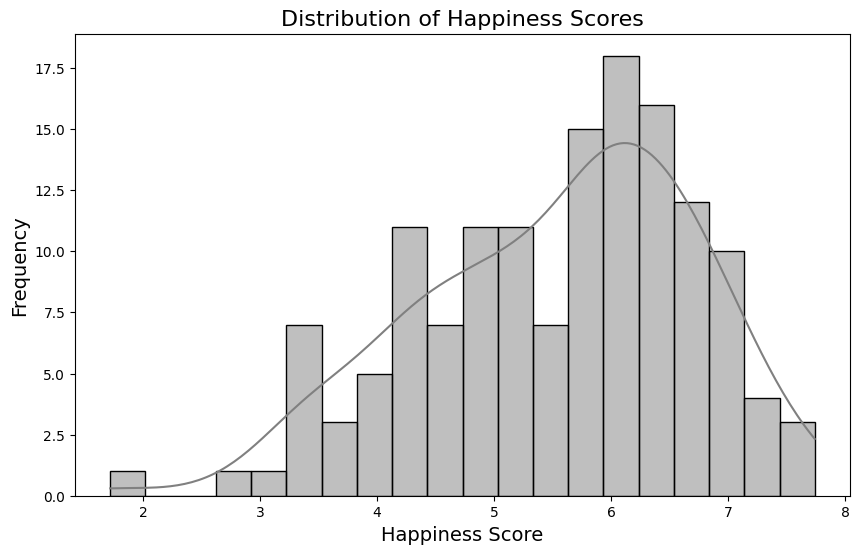

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='grey', edgecolor='black')

# Add labels and title
plt.title("Distribution of Happiness Scores", fontsize=16)
plt.xlabel("Happiness Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()


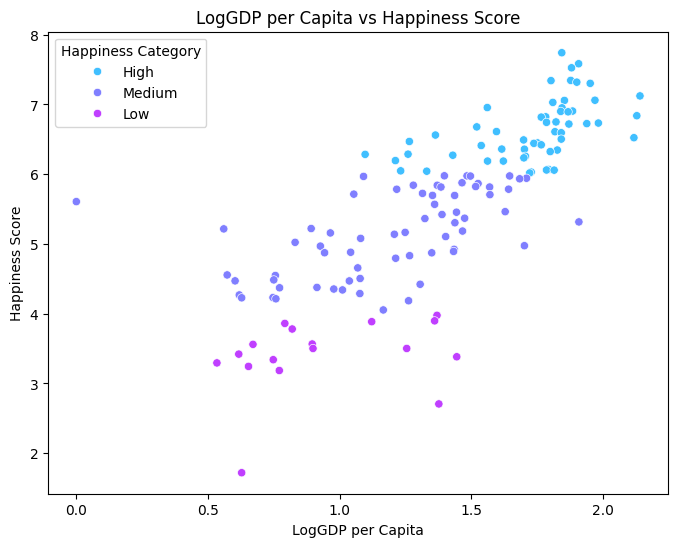

In [ ]:
# 6.4 Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category', palette='cool')
plt.title('LogGDP per Capita vs Happiness Score')
plt.xlabel('LogGDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

#3.2 Problem - 2 - Some Advance Data Exploration Task:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:

#Steps:
#1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

##2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
#3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_df = df[df['Country name'].isin(south_asian_countries)]
filtered_df.to_csv('/content/drive/MyDrive/Concept of technology and AI/asian_country.csv', index=False)

# Task - 2 - Composite Score Ranking:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# # following metrics:
# # Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
# + 0.30 × Healthy Life Expectancy
# 2. Rank the South Asian countries based on the Composite Score in descending order.
# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.


In [ ]:
#1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
#following metrics:

#Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
south_asian_df = pd.read_csv('/content/drive/MyDrive/Concept of technology and AI/asian_country.csv')
south_asian_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


In [ ]:
#2. Rank the South Asian countries based on the Composite Score in descending order.
south_asian_df['composite_score'] = 0.40 * df['Log GDP per capita'] + 0.30 * df['Social support'] + 0.30 * df['Healthy life expectancy']
south_asian_df.sort_values(by='composite_score', ascending=False)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,composite_score
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,1.4529
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,1.4289
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.4187
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,1.4177
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,1.4108
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,1.3971


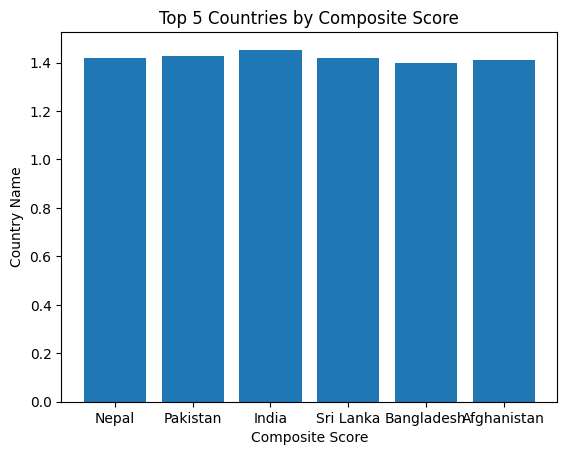

In [ ]:
#3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
plt.bar(south_asian_df['Country name'], south_asian_df['composite_score'])
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 Countries by Composite Score')
plt.show()

# Task - 3 - Outlier Detection:
# Tasks:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
# 2. Define outliers using the 1.5 × IQR rule.
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
# in a different color.
# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

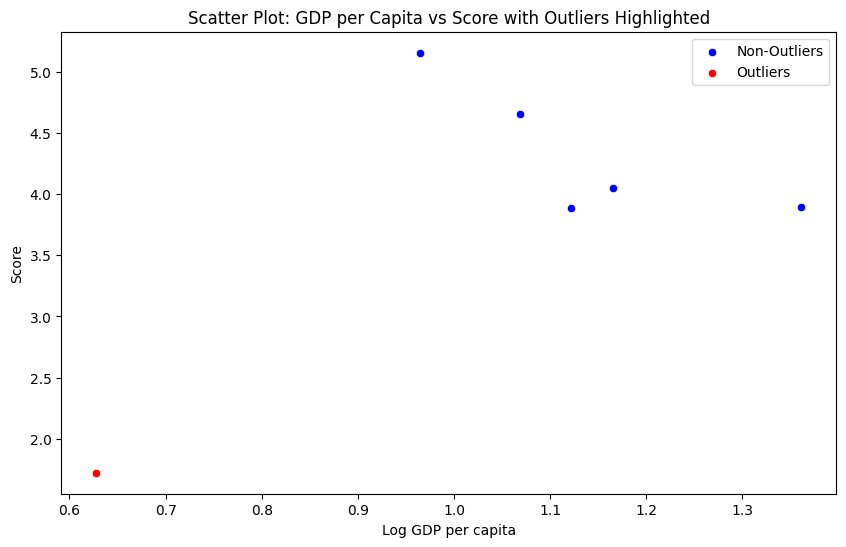

In [ ]:
# Task - 3 - Outlier Detection

# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
Q1_score = south_asian_df['score'].quantile(0.25)
Q3_score = south_asian_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# 2. Define outliers using the 1.5 × IQR rule
score_outliers = south_asian_df[(south_asian_df['score'] < (Q1_score - 1.5 * IQR_score)) |
                                (south_asian_df['score'] > (Q3_score + 1.5 * IQR_score))]

gdp_outliers = south_asian_df[(south_asian_df['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) |
                               (south_asian_df['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]

outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_df, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Scatter Plot: GDP per Capita vs Score with Outliers Highlighted')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()
# These outlier are the extreme values that are present in the columns .These outliers have some effects on the mean but a less effect on the  median and the mode.

# Task - 4 - Exploring Trends Across Metrics:
# Tasks:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
# {pearson correlation} with the Score for South Asian countries
# 2. Create scatter plots with trendlines for these metrics against the Score.
# 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
# South Asian countries.

Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


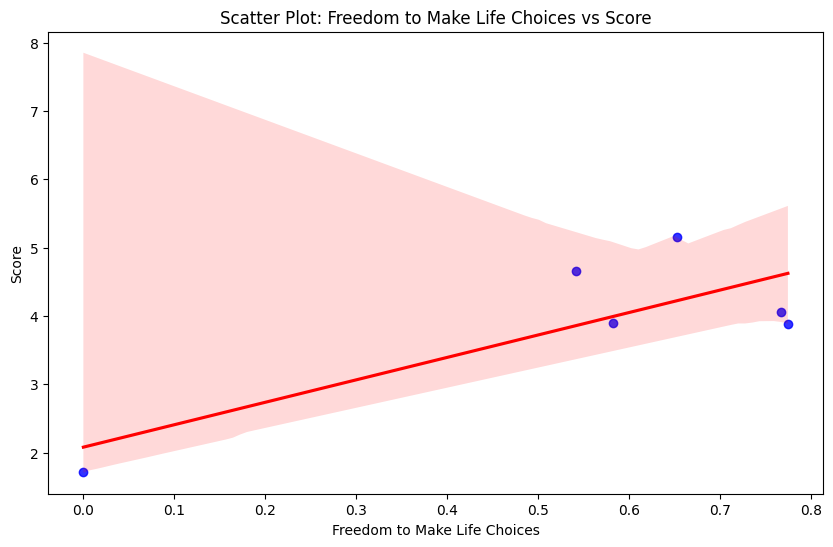

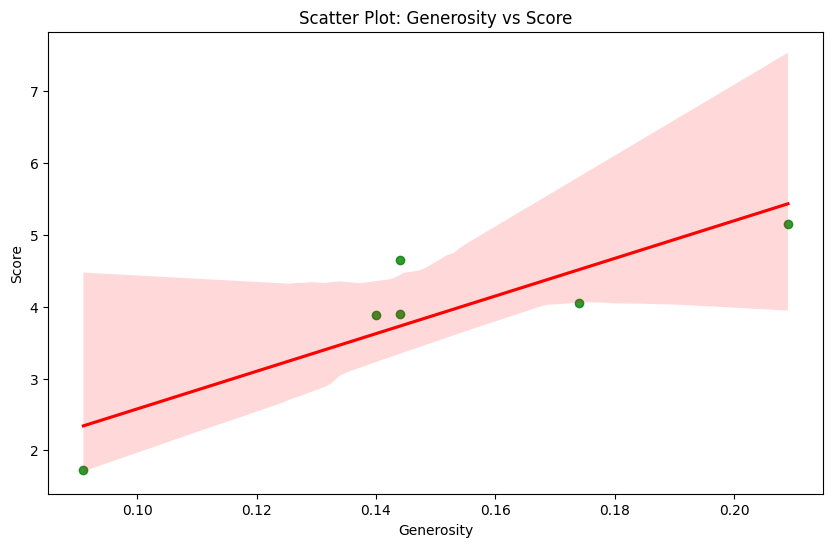

In [ ]:
# Task - 4 - Exploring Trends Across Metrics

# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation(Pearson correlation)
# with the Score for South Asian countries.
freedom_corr = south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])
generosity_corr = south_asian_df['Generosity'].corr(south_asian_df['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {freedom_corr}")
print(f"Pearson correlation between Generosity and Score: {generosity_corr}")

# 2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Scatter Plot: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()
# Answer:
# The highest the pearsons coefficients between these metrices the strongest the relationship is and the lowest the pearsons coefficient the weakest the relationship. For example here the pearsons coefficient between the freedom and the score is is 0.80 and of that for the generosity and the score is 0.87.so here the stronger relationship is between the generosity and the score.since the pearsons coefficients lies between the values of -1 to 1 higher the coefficient the stronger the relationship.

# Task - 5 - Gap Analysis:
# Tasks:
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
# for each South Asian country.
# 2. Rank the South Asian countries by this gap in both ascending and descending order.

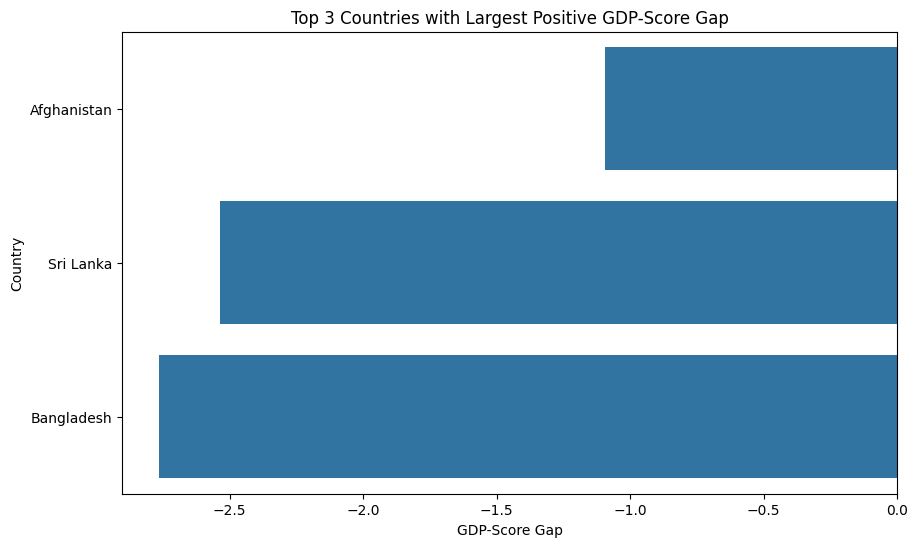

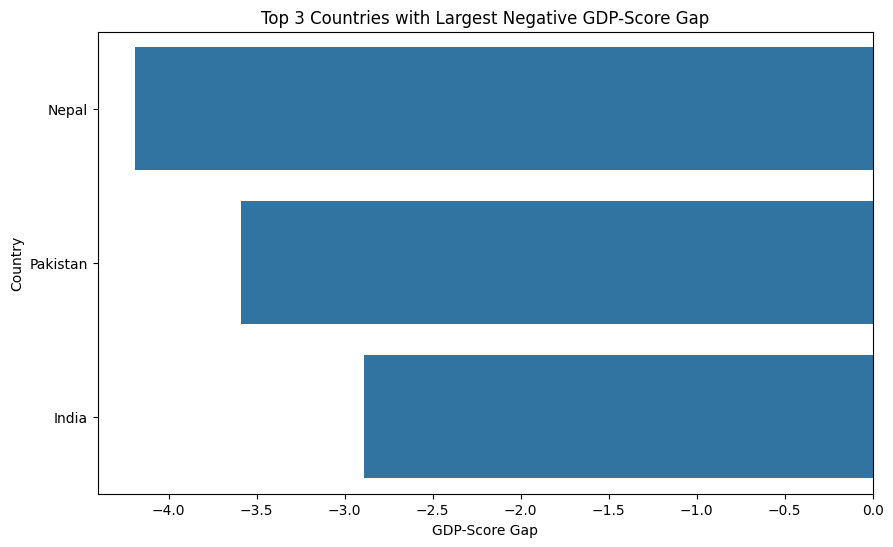

In [ ]:
# Task - 5 - Gap Analysis

# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
# Ascending order
ascending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)

# Descending order
descending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)

# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()
# The reasons behind the positive gaps is likely due to High GDP per capita in countries like Maldives Bhutan and the reasons behind the Negative gaps is relatively due to their low gdp.Positive gaps indicate underperformance in quality-of-life factors, while negative gaps show that even lower-income nations can achieve well-being with strong social policies.

# 3.3 Problem - 3 - Comparative Analysis:
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# Tasks:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
# following list:
# middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
# "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
# "United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
filtered_data = df[df['Country name'].isin(middle_east_countries)]
middle_east = pd.DataFrame(filtered_data)
middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


# Complete the following task:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# • Which region has higher happiness Scores on average?

In [ ]:
# 1. Descriptive Statistics:

# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
south_asia_mean = south_asian_df['score'].mean()
south_asia_std = south_asian_df['score'].std()

middle_east_mean = middle_east['score'].mean()
middle_east_std = middle_east['score'].std()

print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

# • Which region has higher happiness Scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


# 2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.
# • Plot bar charts comparing these charts.

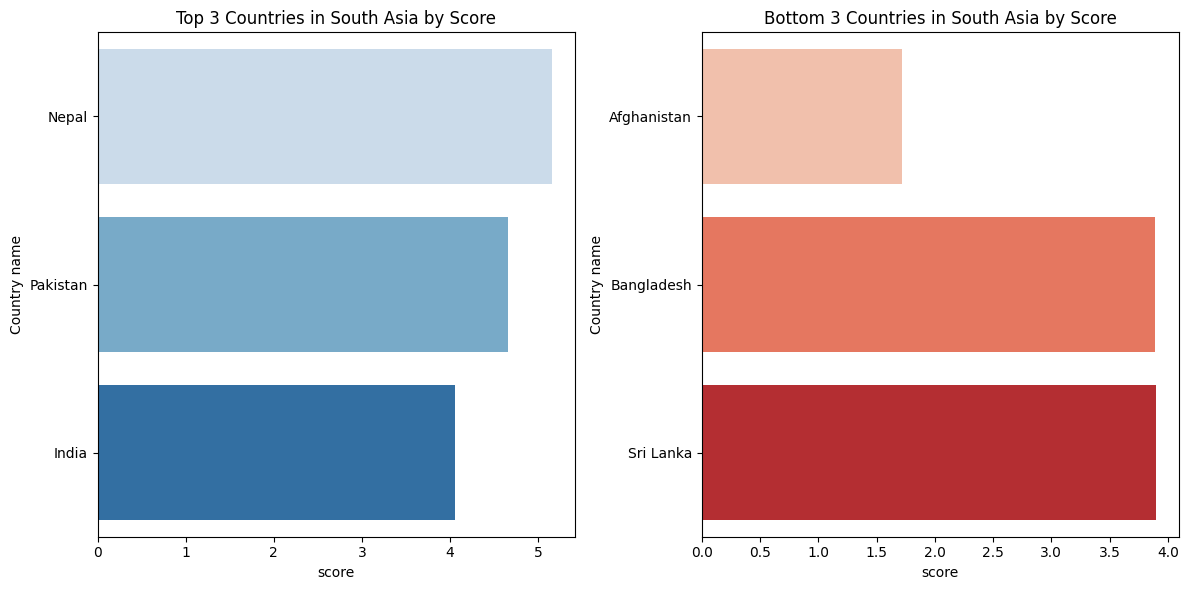

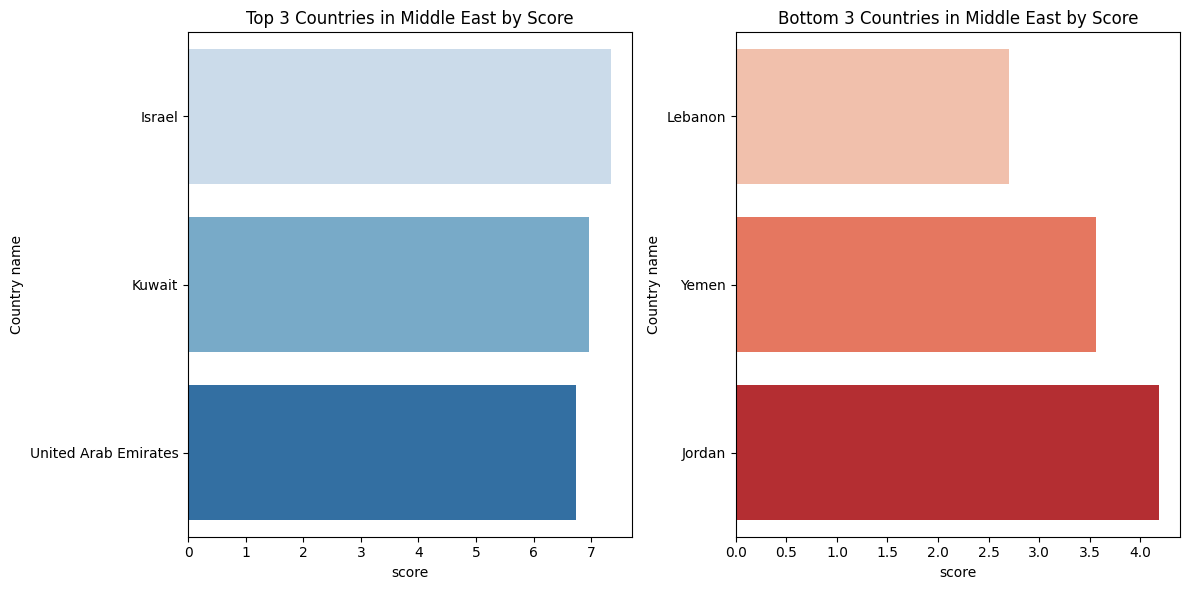

In [ ]:
# 2. Top and Bottom Performers:

# • Identify the top 3 and bottom 3 countries in each region based on the score.
south_asia_top_3 = south_asian_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
south_asia_bottom_3 = south_asian_df[['Country name', 'score']].sort_values(by='score').head(3)

middle_east_top_3 = middle_east[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
middle_east_bottom_3 = middle_east[['Country name', 'score']].sort_values(by='score').head(3)

# • Plot bar charts comparing these charts.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=south_asia_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=south_asia_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=middle_east_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=middle_east_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

# 3. Metric Comparisons:
# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
# between the regions using grouped bar charts.
# • Which metrics show the largest disparity between the two regions?

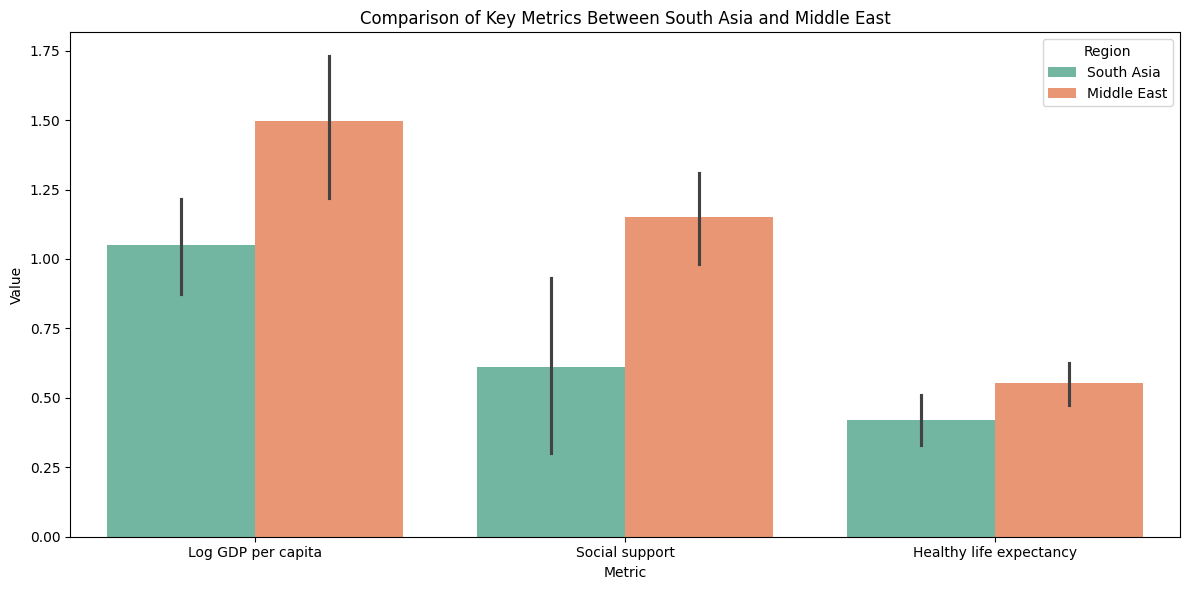

In [ ]:
# 3. Metric Comparisons:

# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = south_asian_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
middle_east_metrics = middle_east[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

comparison_df = pd.concat([south_asia_metrics, middle_east_metrics]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='Set2')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()
# The middle one at the bar graph shows the largest disparity between the two regions.The blue graph is placed high rather than the graph of the green one.

# 4. Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# • Which region has greater variability in happiness?

In [ ]:
# 4. Happiness Disparity:

# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
south_asia_score_range = south_asian_df['score'].max() - south_asian_df['score'].min()
middle_east_score_range = middle_east['score'].max() - middle_east['score'].min()

south_asia_cv = south_asian_df['score'].std() / south_asian_df['score'].mean()
middle_east_cv = middle_east['score'].std() / middle_east['score'].mean()

print(f"South Asia Score Range: {south_asia_score_range}")
print(f"Middle East Score Range: {middle_east_score_range}")
print(f"South Asia Coefficient of Variation (CV): {south_asia_cv}")
print(f"Middle East Coefficient of Variation (CV): {middle_east_cv}")
# Answer: According to the result for the coefficient of variation in both the regions the south asian country has a variation of 0.33 and that of middle east is 0.40 so the middle east has the greater variability in happiness.

South Asia Score Range: 3.4370000000000003
Middle East Score Range: 4.634
South Asia Coefficient of Variation (CV): 0.3021482883337427
Middle East Coefficient of Variation (CV): 0.28938880812119405


# 5. Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
# Generosity within each region.
# • Create scatter plots to visualize and interpret the relationships.

South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


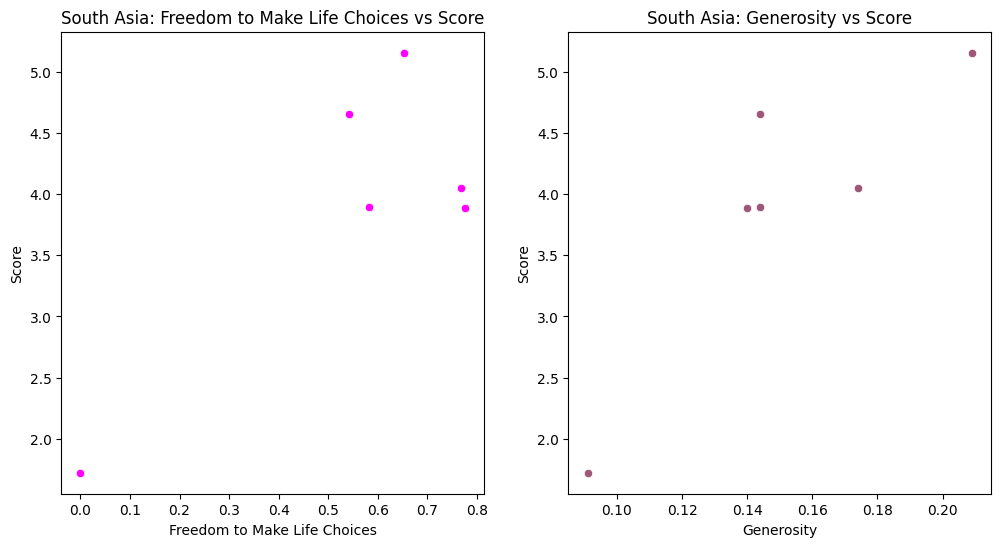

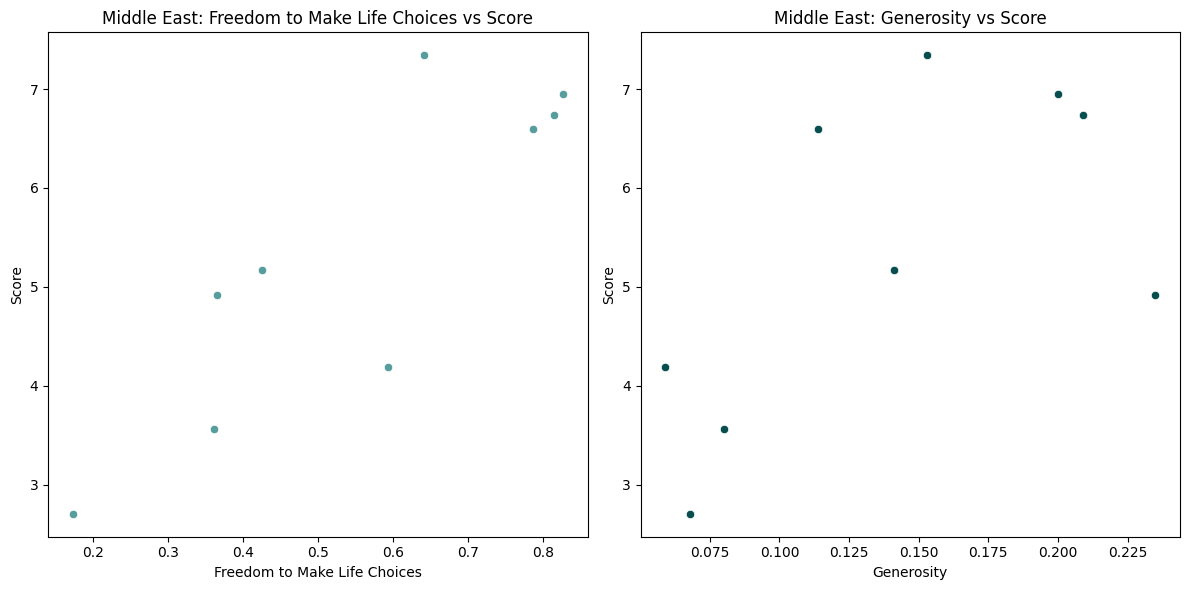

In [ ]:
# 5. Correlation Analysis:

# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
south_asia_corr = south_asian_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlation Matrix:")
print(south_asia_corr)
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)

# • Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_df, color='#FF00FF') # Color changed to red
plt.title('South Asia: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_df, color='#9e5776') # Color changed to red
plt.title('South Asia: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

# Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east, color='#579d9e')
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east,color='#084e4f')
plt.title('Middle East: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# 6. Outlier Detection:
# • Identify outlier countries in both regions based on Score and GDP per Capita.
# • Plot these outliers and discuss their implications.

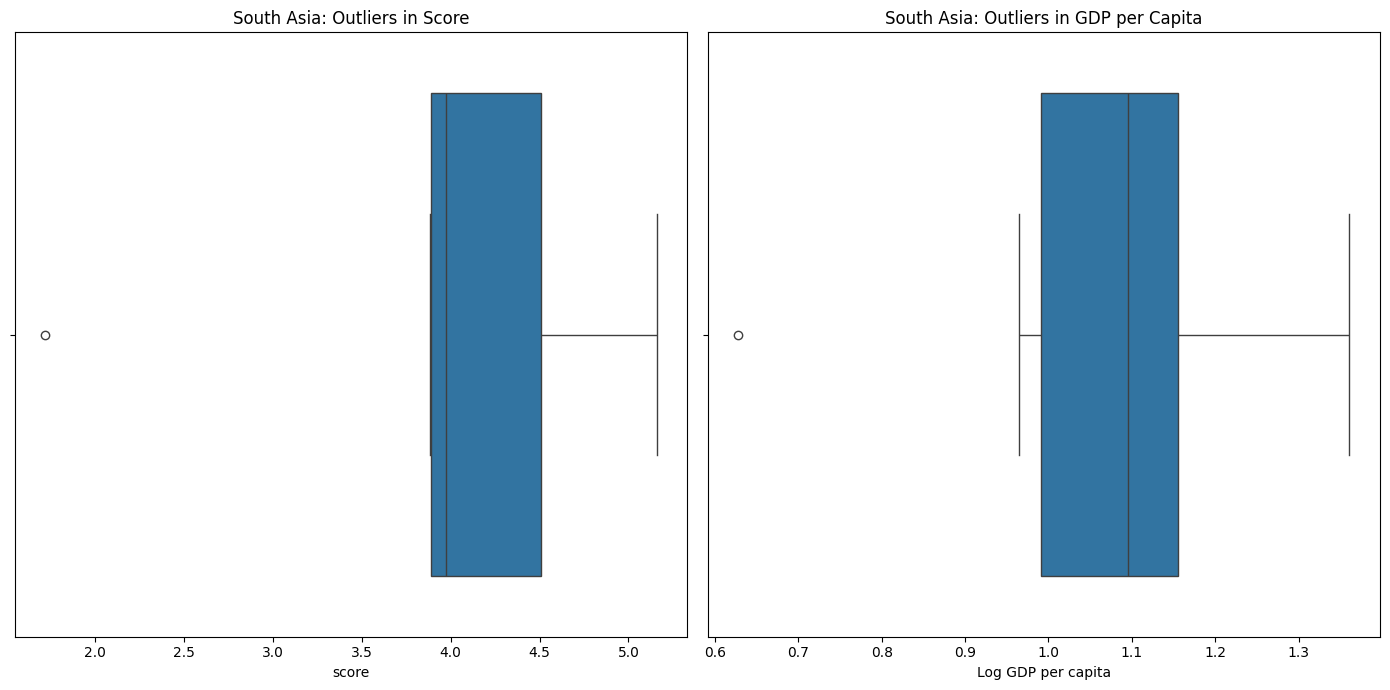

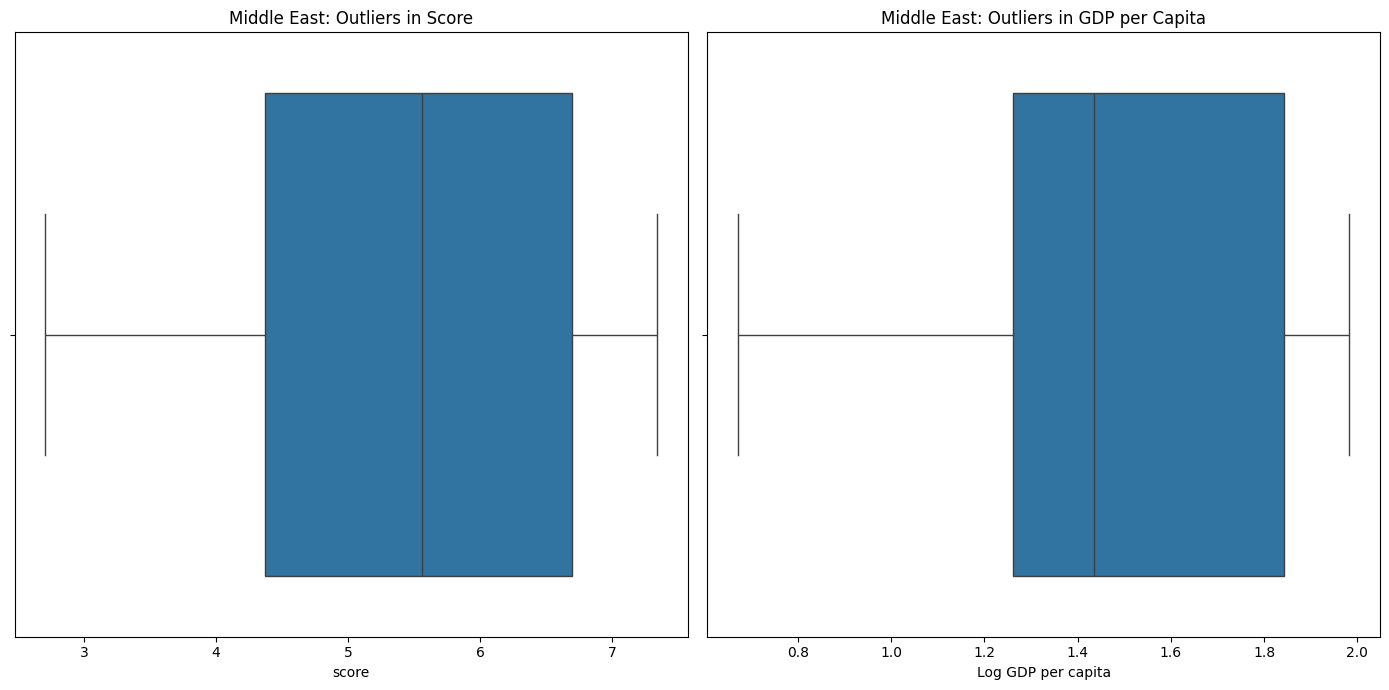

,Country name,Log GDP per capita


In [ ]:
# 6. Outlier Detection:

# • Identify outlier countries in both regions based on Score and GDP per Capita.
south_asia_outliers_score = south_asian_df[(south_asian_df['score'] < south_asian_df['score'].quantile(0.25) - 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25))) |
                                            (south_asian_df['score'] > south_asian_df['score'].quantile(0.75) + 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25)))]

south_asia_outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < south_asian_df['Log GDP per capita'].quantile(0.25) - 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25))) |
                                           (south_asian_df['Log GDP per capita'] > south_asian_df['Log GDP per capita'].quantile(0.75) + 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25)))]

middle_east_outliers_score = middle_east[(middle_east['score'] < middle_east['score'].quantile(0.25) - 1.5 * (middle_east['score'].quantile(0.75) - middle_east['score'].quantile(0.25))) |
                                             (middle_east['score'] > middle_east['score'].quantile(0.75) + 1.5 * (middle_east['score'].quantile(0.75) - middle_east['score'].quantile(0.25)))]

middle_east_outliers_gdp = middle_east[(middle_east['Log GDP per capita'] < middle_east['Log GDP per capita'].quantile(0.25) - 1.5 * (middle_east['Log GDP per capita'].quantile(0.75) - middle_east['Log GDP per capita'].quantile(0.25))) |
                                            (middle_east['Log GDP per capita'] > middle_east['Log GDP per capita'].quantile(0.75) + 1.5 * (middle_east['Log GDP per capita'].quantile(0.75) - middle_east['Log GDP per capita'].quantile(0.25)))]

# • Plot these outliers and discuss their implications.
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=south_asian_df['score'])
plt.title('South Asia: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=south_asian_df['Log GDP per capita'])
plt.title('South Asia: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=middle_east['score'])
plt.title('Middle East: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=middle_east['Log GDP per capita'])
plt.title('Middle East: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

south_asia_outliers_score[['Country name', 'score']]
south_asia_outliers_gdp[['Country name', 'Log GDP per capita']]
middle_east_outliers_score[['Country name', 'score']]
middle_east_outliers_gdp[['Country name', 'Log GDP per capita']]
# These outlier are the extreme values that are present in the columns .These outliers have some effects on the mean but a less effect on the  median and the mode.

#7. Visualization:
#• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
#• Interpret the key differences in distribution shapes, medians, and outliers.

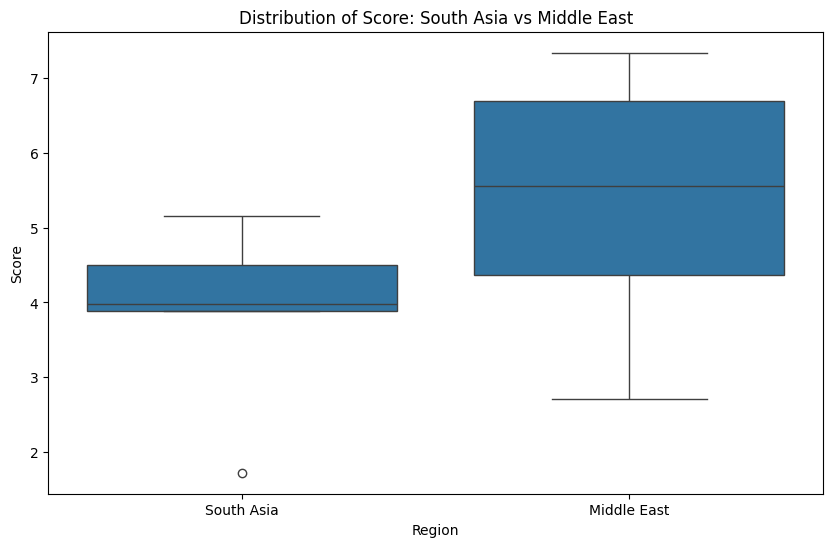

In [ ]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_df.assign(Region='South Asia'), middle_east.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()
# A box plot gives the distribution of data for a given group including the median,interquartile,outliers,etc.Since the country has the single unique value the box plot cannot display the range and collapses into a single line so it lokks like this.Here the midian line is the score and the outlier are not shown which mean the outlier is not present.